In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset


In [125]:
#leer y procesar el dataset
data = pd.read_csv(r'C:\Users\Rulig\OneDrive\Escritorio\apps\progra\UNAM\Ia\ayudantias de lab\mnist_test.csv')
labels= data.iloc[:, 0].values
features = data.iloc[:, 1:].values
features=features/255.0
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [126]:
class MNISTDataset(Dataset):
    def __init__(self, X,Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
train_dataset = MNISTDataset(X_train, y_train)
test_dataset = MNISTDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [127]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(784, 128)
        self.sigm = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
    def forward(self, x):
        x = self.fc1(x)
        x = self.sigm(x)
        x = self.fc2(x)
        x = self.sigm(x)
        x = self.fc3(x)
        return x
model = NeuralNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [128]:
epochs =1000
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images.float())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')
print('Finished Training')

Epoch [1000/1000], Loss: 0.5151
Finished Training


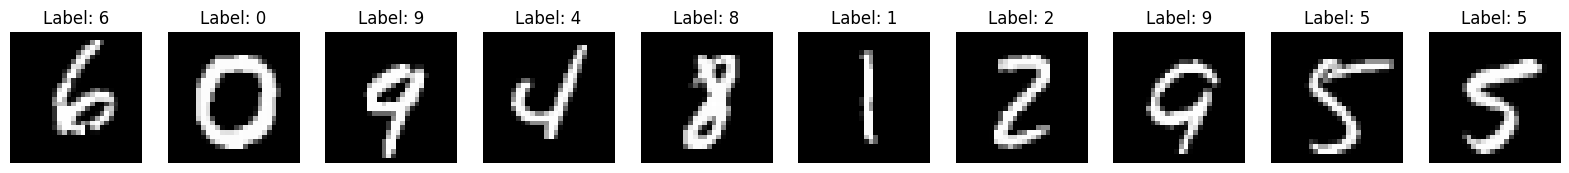

In [129]:
import matplotlib.pyplot as plt

def plot_random_sample(x, y, num_samples=10):
    indices = np.random.choice(range(0, x.shape[0]), size=num_samples)
    X_subset = x[indices].reshape(-1, 28, 28)
    y_subset = y[indices]

    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples*2, 2))
    for i, ax in enumerate(axes):
        ax.imshow(X_subset[i], cmap='gray')
        ax.set_title(f'Label: {y_subset[i]}')
        ax.axis('off')
    plt.show()
plot_random_sample(X_train, y_train)


Accuracy of the model on the test set: 92.15%


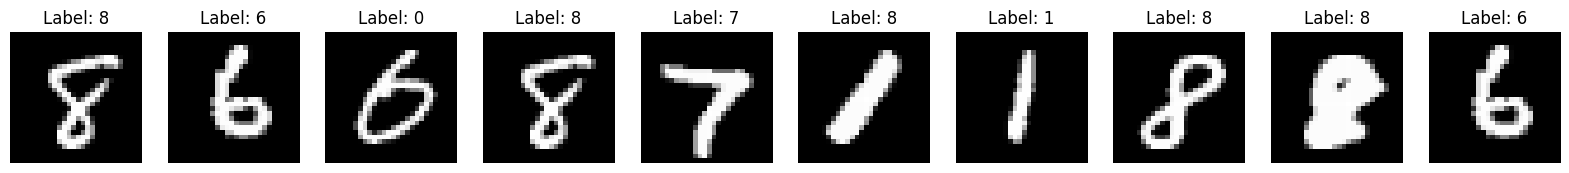

In [130]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.float())
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images.float())
        _, predicted = torch.max(outputs.data, 1)
plot_random_sample(images,predicted)